## Some standard experiments

In [3]:
import pybamm
import numpy as np
import matplotlib.pyplot as plt

pybamm.set_logging_level("NOTICE")

## CCCV

In [4]:
experiment = pybamm.Experiment([
    (f"Discharge at 1C until 2.5V",
    "Rest for 1 hour",
    f"Charge at 2C until 4.2V",
    "Hold at 4.2V until C/50"),
])
model = pybamm.lithium_ion.SPMe()
parameter_values = pybamm.ParameterValues(chemistry=pybamm.parameter_sets.Chen2020)
sim = pybamm.Simulation(model, experiment=experiment, parameter_values=parameter_values)
sim.solve()
sim.plot(["Terminal voltage [V]", "Current [A]"])

2022-10-03 09:47:54.036 - [NOTICE] callbacks.on_cycle_start(174): Cycle 1/1 (22.360 ms elapsed) --------------------
2022-10-03 09:47:54.036 - [NOTICE] callbacks.on_step_start(182): Cycle 1/1, step 1/4: Discharge at 1C until 2.5V
2022-10-03 09:47:54.166 - [NOTICE] callbacks.on_step_start(182): Cycle 1/1, step 2/4: Rest for 1 hour
2022-10-03 09:47:54.275 - [NOTICE] callbacks.on_step_start(182): Cycle 1/1, step 3/4: Charge at 2C until 4.2V
2022-10-03 09:47:54.351 - [NOTICE] callbacks.on_step_start(182): Cycle 1/1, step 4/4: Hold at 4.2V until C/50
2022-10-03 09:47:54.878 - [NOTICE] callbacks.on_experiment_end(222): Finish experiment simulation, took 864.483 ms


interactive(children=(FloatSlider(value=0.0, description='t', max=3.646741562239696, step=0.03646741562239696)…

In [5]:
experiment = pybamm.Experiment([
    ("Discharge at 1C until 2.5V",
    "Rest for 1 hour",
    "Charge at 1C until 4.2V",
    "Hold at 4.2V until C/50")]*2)
# 上述*2操作生成了一个含有两个tuple的list，一个tuple是一个cycle   
sim = pybamm.Simulation(model, experiment=experiment, parameter_values=parameter_values)
sim.solve()
sim.plot(["Terminal voltage [V]", "Current [A]"])

2022-10-03 09:48:04.108 - [NOTICE] callbacks.on_cycle_start(174): Cycle 1/2 (19.103 ms elapsed) --------------------
2022-10-03 09:48:04.108 - [NOTICE] callbacks.on_step_start(182): Cycle 1/2, step 1/4: Discharge at 1C until 2.5V
2022-10-03 09:48:04.212 - [NOTICE] callbacks.on_step_start(182): Cycle 1/2, step 2/4: Rest for 1 hour
2022-10-03 09:48:04.294 - [NOTICE] callbacks.on_step_start(182): Cycle 1/2, step 3/4: Charge at 1C until 4.2V
2022-10-03 09:48:04.378 - [NOTICE] callbacks.on_step_start(182): Cycle 1/2, step 4/4: Hold at 4.2V until C/50
2022-10-03 09:48:04.846 - [NOTICE] callbacks.on_cycle_start(174): Cycle 2/2 (757.727 ms elapsed) --------------------
2022-10-03 09:48:04.847 - [NOTICE] callbacks.on_step_start(182): Cycle 2/2, step 1/4: Discharge at 1C until 2.5V
2022-10-03 09:48:04.921 - [NOTICE] callbacks.on_step_start(182): Cycle 2/2, step 2/4: Rest for 1 hour
2022-10-03 09:48:04.977 - [NOTICE] callbacks.on_step_start(182): Cycle 2/2, step 3/4: Charge at 1C until 4.2V
2022-

interactive(children=(FloatSlider(value=0.0, description='t', max=7.8317480910566, step=0.07831748091056599), …

Interacting with the solution of an experiment

In [6]:
sim.solution.cycles[1].plot(["Terminal voltage [V]", "Current [A]"])

interactive(children=(FloatSlider(value=3.91359666372868, description='t', max=7.8317480910566, min=3.91359666…

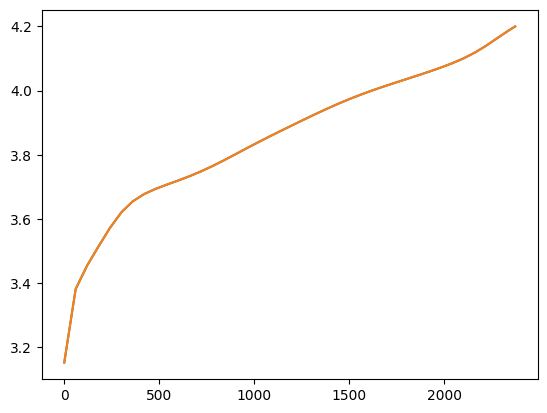

In [7]:
sol = sim.solution
fig, ax = plt.subplots()
for cycle in sol.cycles:
    t = cycle.steps[2]["Time [s]"].data
    V = cycle.steps[2]["Terminal voltage [V]"].data
    ax.plot(t-t[0],V)

## Defining an experiment using a function

In [8]:
def get_experiment(discharge, charge):
    experiment = pybamm.Experiment([
        (f"Discharge at {discharge}C until 2.5V",
        "Rest for 1 hour",
        f"Charge at {charge}C until 4.2V",
        "Hold at 4.2V until C/50"),
    ])
    return experiment

experiment = get_experiment(2,0.5)
experiment

pybamm.Experiment(['Discharge at 2C until 2.5V', 'Rest for 1 hour', 'Charge at 0.5C until 4.2V', 'Hold at 4.2V until C/50'])

In [9]:
sim = pybamm.Simulation(model, experiment=experiment, parameter_values=parameter_values)
sim.solve()
sim.plot(["Terminal voltage [V]", "Current [A]"])

2022-10-03 09:51:52.332 - [NOTICE] callbacks.on_cycle_start(174): Cycle 1/1 (22.520 ms elapsed) --------------------
2022-10-03 09:51:52.332 - [NOTICE] callbacks.on_step_start(182): Cycle 1/1, step 1/4: Discharge at 2C until 2.5V
2022-10-03 09:51:52.416 - [NOTICE] callbacks.on_step_start(182): Cycle 1/1, step 2/4: Rest for 1 hour
2022-10-03 09:51:52.507 - [NOTICE] callbacks.on_step_start(182): Cycle 1/1, step 3/4: Charge at 0.5C until 4.2V
2022-10-03 09:51:52.649 - [NOTICE] callbacks.on_step_start(182): Cycle 1/1, step 4/4: Hold at 4.2V until C/50
2022-10-03 09:51:53.060 - [NOTICE] callbacks.on_experiment_end(222): Finish experiment simulation, took 750.932 ms


interactive(children=(FloatSlider(value=0.0, description='t', max=4.064850764634787, step=0.04064850764634787)…

## Constant power

In [10]:
parameter_values["Nominal cell capacity [A.h]"]

5.0

In [11]:
experiment = pybamm.Experiment([
    ("Discharge at 5A until 2.5V",
    "Charge at 15W until 4.2V",
    "Hold at 4.2V until 0.01A")
])
sim = pybamm.Simulation(model, experiment=experiment, parameter_values=parameter_values)
sim.solve()
sim.plot(["Current [A]", "Terminal power [W]", "Terminal voltage [V]"])

2022-10-03 09:53:35.503 - [NOTICE] callbacks.on_cycle_start(174): Cycle 1/1 (18.666 ms elapsed) --------------------
2022-10-03 09:53:35.503 - [NOTICE] callbacks.on_step_start(182): Cycle 1/1, step 1/3: Discharge at 5A until 2.5V
2022-10-03 09:53:35.634 - [NOTICE] callbacks.on_step_start(182): Cycle 1/1, step 2/3: Charge at 15W until 4.2V
2022-10-03 09:53:35.953 - [NOTICE] callbacks.on_step_start(182): Cycle 1/1, step 3/3: Hold at 4.2V until 0.01A
2022-10-03 09:53:36.492 - [NOTICE] callbacks.on_experiment_end(222): Finish experiment simulation, took 1.007 s


interactive(children=(FloatSlider(value=0.0, description='t', max=3.810495282876112, step=0.03810495282876112)…

## Pulse charging

In [12]:
cycle = ["Discharge at 5A until 2.5V"] + [
    "Charge at 2C for 1 minute (1 second period)",
    "Rest for 5 minutes (10 second period)"] * 4 + [
    "Charge at 15W until 4.2V",
    "Hold at 4.2V until 0.01A"]
experiment = pybamm.Experiment([
    tuple(cycle)
])
sim = pybamm.Simulation(model, experiment=experiment, parameter_values=parameter_values)
sim.solve()
sim.plot(["Current [A]", "Terminal power [W]", "Terminal voltage [V]"])

2022-10-03 09:55:22.866 - [NOTICE] callbacks.on_cycle_start(174): Cycle 1/1 (19.707 ms elapsed) --------------------
2022-10-03 09:55:22.866 - [NOTICE] callbacks.on_step_start(182): Cycle 1/1, step 1/11: Discharge at 5A until 2.5V
2022-10-03 09:55:22.970 - [NOTICE] callbacks.on_step_start(182): Cycle 1/1, step 2/11: Charge at 2C for 1 minute (1 second period)
2022-10-03 09:55:23.014 - [NOTICE] callbacks.on_step_start(182): Cycle 1/1, step 3/11: Rest for 5 minutes (10 second period)
2022-10-03 09:55:23.057 - [NOTICE] callbacks.on_step_start(182): Cycle 1/1, step 4/11: Charge at 2C for 1 minute (1 second period)
2022-10-03 09:55:23.067 - [NOTICE] callbacks.on_step_start(182): Cycle 1/1, step 5/11: Rest for 5 minutes (10 second period)
2022-10-03 09:55:23.078 - [NOTICE] callbacks.on_step_start(182): Cycle 1/1, step 6/11: Charge at 2C for 1 minute (1 second period)
2022-10-03 09:55:23.087 - [NOTICE] callbacks.on_step_start(182): Cycle 1/1, step 7/11: Rest for 5 minutes (10 second period)
2

interactive(children=(FloatSlider(value=0.0, description='t', max=4.05504657693623, step=0.040550465769362304)…

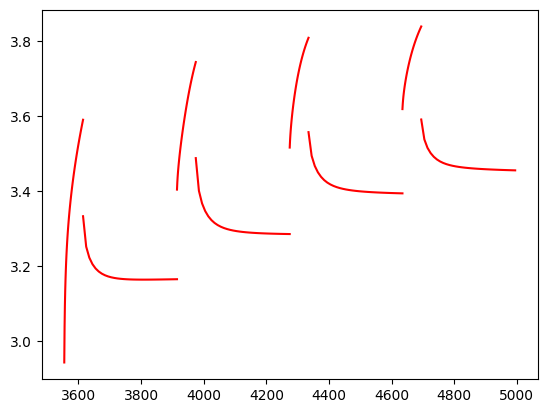

In [13]:
sol = sim.solution
for i in range(1,9):
    step = sol.cycles[0].steps[i]
    plt.plot(step["Time [s]"].data, step["Terminal voltage [V]"].data, "r-")

interactive(children=(FloatSlider(value=0.9873919920558898, description='t', max=1.387391992055889, min=0.9873…

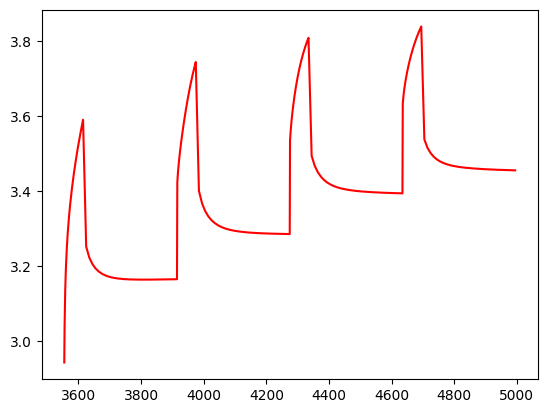

In [14]:
sol = sim.solution
pulses = sol.cycles[0].steps[1]
for i in range(2,9):
    pulses += sol.cycles[0].steps[i]
pulses.plot(["Terminal voltage [V]"])
plt.plot(pulses["Time [s]"].data,pulses["Terminal voltage [V]"].data,"r-")

## GITT

In [15]:
cycle = [
    "Discharge at C/20 for 1 hour",
    "Rest for 1 hour",
] * 20
experiment = pybamm.Experiment([tuple(cycle)])
sim = pybamm.Simulation(model, experiment=experiment, parameter_values=parameter_values)
sim.solve()
sim.plot(["Terminal voltage [V]", "Current [A]"])

2022-10-03 09:55:36.417 - [NOTICE] callbacks.on_cycle_start(174): Cycle 1/1 (19.343 ms elapsed) --------------------
2022-10-03 09:55:36.418 - [NOTICE] callbacks.on_step_start(182): Cycle 1/1, step 1/40: Discharge at C/20 for 1 hour
2022-10-03 09:55:36.512 - [NOTICE] callbacks.on_step_start(182): Cycle 1/1, step 2/40: Rest for 1 hour
2022-10-03 09:55:36.610 - [NOTICE] callbacks.on_step_start(182): Cycle 1/1, step 3/40: Discharge at C/20 for 1 hour
2022-10-03 09:55:36.682 - [NOTICE] callbacks.on_step_start(182): Cycle 1/1, step 4/40: Rest for 1 hour
2022-10-03 09:55:36.737 - [NOTICE] callbacks.on_step_start(182): Cycle 1/1, step 5/40: Discharge at C/20 for 1 hour
2022-10-03 09:55:36.802 - [NOTICE] callbacks.on_step_start(182): Cycle 1/1, step 6/40: Rest for 1 hour
2022-10-03 09:55:36.856 - [NOTICE] callbacks.on_step_start(182): Cycle 1/1, step 7/40: Discharge at C/20 for 1 hour
2022-10-03 09:55:36.912 - [NOTICE] callbacks.on_step_start(182): Cycle 1/1, step 8/40: Rest for 1 hour
2022-10

interactive(children=(FloatSlider(value=0.0, description='t', max=40.000000000000014, step=0.40000000000000013…

OCV measurements

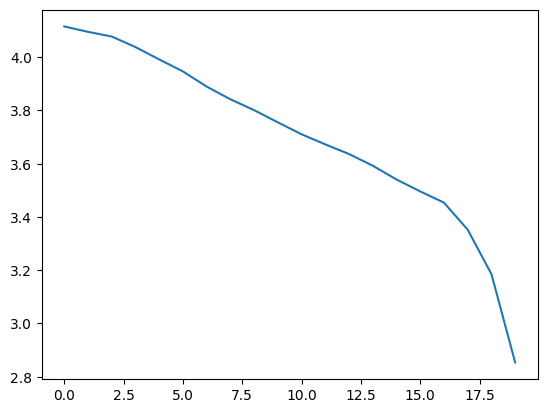

In [16]:
sol = sim.solution

def extract_ocv(step):
    return step["Terminal voltage [V]"].data[-1]

# ocvs = [extract_ocv(step) for i,step in enumerate(sol.cycles[0].steps) if i%2==1]
ocvs=[]
for i,step in enumerate(sol.cycles[0].steps):
    if i%2==1:
        ocvs.append(extract_ocv(step))
plt.plot(np.arange(20),ocvs)

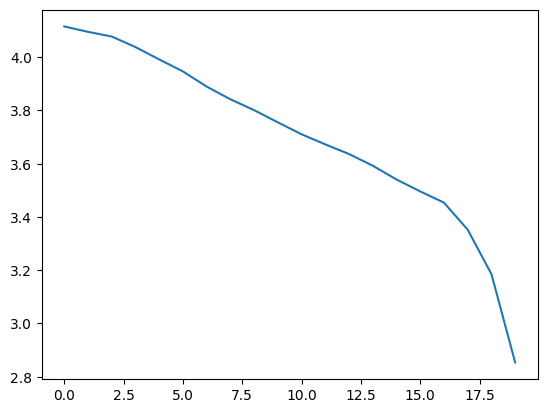

In [17]:
sol = sim.solution

def extract_ocv(step):
    return step["Terminal voltage [V]"].data[-1]

ocvs = [extract_ocv(step) for i,step in enumerate(sol.cycles[0].steps) if i%2==1]
plt.plot(np.arange(20),ocvs)

Resistance measurements

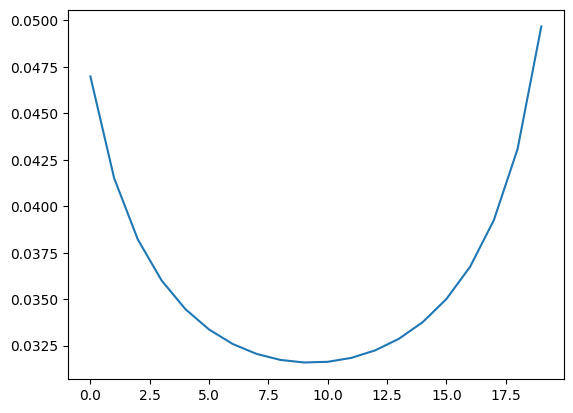

In [18]:
def extract_resistance(step):
    return step["Local ECM resistance [Ohm]"].data[0]

Rs = [extract_resistance(step) for i,step in enumerate(sol.cycles[0].steps) if i%2==0]
plt.plot(np.arange(20),Rs)

## Initial SOC

In [21]:
experiment = pybamm.Experiment([("Charge at 1C until 4.2V", "Hold at 4.2V until C/50")])
sols = []
init_socs = [0,0.2,0.4,0.6,0.8]
for initial_soc in init_socs:
  sim = pybamm.Simulation(model, parameter_values=parameter_values, experiment=experiment)
  sol = sim.solve(initial_soc=initial_soc)
  sols.append(sol)

pybamm.dynamic_plot(sols,labels=[f"initial soc = {x}" for x in init_socs])
pybamm.dynamic_plot(sols,output_variables=["Average negative particle concentration [mol.m-3]"],labels=[f"initial soc = {x}" for x in init_socs])

2022-10-03 10:00:28.340 - [NOTICE] callbacks.on_cycle_start(174): Cycle 1/1 (22.731 ms elapsed) --------------------
2022-10-03 10:00:28.341 - [NOTICE] callbacks.on_step_start(182): Cycle 1/1, step 1/2: Charge at 1C until 4.2V
2022-10-03 10:00:28.471 - [NOTICE] callbacks.on_step_start(182): Cycle 1/1, step 2/2: Hold at 4.2V until C/50
2022-10-03 10:00:28.960 - [NOTICE] callbacks.on_experiment_end(222): Finish experiment simulation, took 641.694 ms
2022-10-03 10:00:29.858 - [NOTICE] callbacks.on_cycle_start(174): Cycle 1/1 (20.560 ms elapsed) --------------------
2022-10-03 10:00:29.858 - [NOTICE] callbacks.on_step_start(182): Cycle 1/1, step 1/2: Charge at 1C until 4.2V
2022-10-03 10:00:29.948 - [NOTICE] callbacks.on_step_start(182): Cycle 1/1, step 2/2: Hold at 4.2V until C/50
2022-10-03 10:00:30.411 - [NOTICE] callbacks.on_experiment_end(222): Finish experiment simulation, took 573.526 ms
2022-10-03 10:00:31.374 - [NOTICE] callbacks.on_cycle_start(174): Cycle 1/1 (18.857 ms elapsed) 

interactive(children=(FloatSlider(value=0.0, description='t', max=1.9586191211566546, step=0.01958619121156654…

interactive(children=(FloatSlider(value=0.0, description='t', max=1.9586191211566546, step=0.01958619121156654…

In [27]:
pybamm.dynamic_plot(sols,
    output_variables=["Average negative particle concentration [mol.m-3]","X-averaged negative particle concentration",
    "R-averaged negative particle concentration","Negative electrolyte concentration"],
    labels=[f"initial soc = {x}" for x in init_socs]
    )
sol.plot(output_variables=["Positive particle concentration"])

interactive(children=(FloatSlider(value=0.0, description='t', max=1.9586191211566546, step=0.01958619121156654…

interactive(children=(FloatSlider(value=0.0, description='t', max=1.0583915544494575, step=0.01058391554449457…

Looking at each CV relaxation

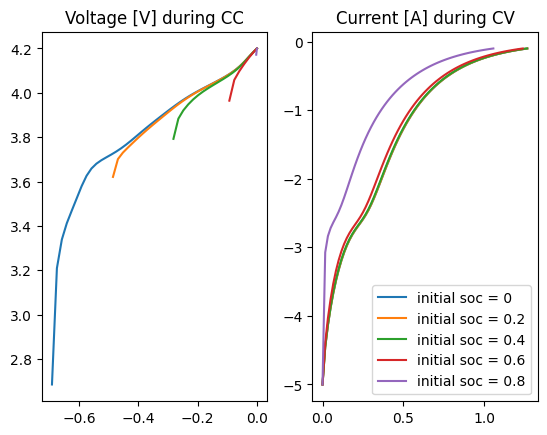

In [28]:
fig, ax = plt.subplots(1,2)

for sol in sols:
  cc = sol.cycles[0].steps[0]
  cv = sol.cycles[0].steps[1]
  t_cc = cc["Time [h]"].data
  t_cv = cv["Time [h]"].data
  ax[0].plot(t_cc-t_cv[0], cc["Terminal voltage [V]"].data)
  ax[0].set_title("Voltage [V] during CC")
  ax[1].plot(t_cv-t_cv[0], cv["Current [A]"].data)
  ax[1].set_title("Current [A] during CV")
  ax[1].legend([f"initial soc = {x}" for x in init_socs])